In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from neurolib.experiments.WPtwo.onen.plot import set_labels

set_labels()

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

pickledir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/optimal_control/WP2/1n")
pickledir_2n = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/optimal_control/WP2/2n")
savedir = os.path.join(os.getcwd(), "Talks_Conf_Workshops_Schools/24/COSYNE/abstract/images")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
with open(os.path.join(pickledir, 'osc_1n_wc.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data_wc = res_read.copy()

with open(os.path.join(pickledir, 'osc_1n_aln.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data_aln = res_read.copy()


with open(os.path.join(pickledir_2n, 'osc_2n_wc.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data_wc_2n = res_read.copy()

with open(os.path.join(pickledir_2n, 'osc_2n_aln.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data_aln_2n = res_read.copy()

dict_keys(['A', 'B', 'C', 'D'])
dict_keys(['A', 'B', 'C', 'D'])
dict_keys(['A', 'B', 'C', 'D', 'E', 'F'])
dict_keys(['A', 'B', 'C', 'D', 'E', 'F'])


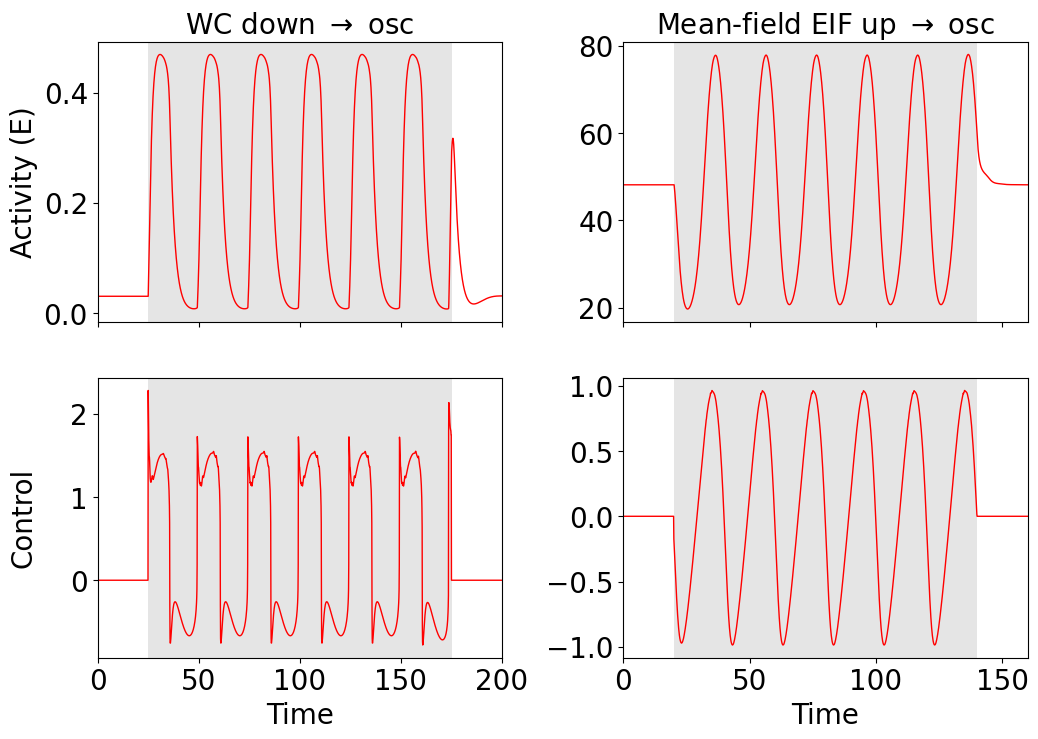

In [75]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(2,2, figsize=(1200*px, 800*px), sharex="col")

time_wc = np.arange(0,200.1, 0.1)
time_aln = np.arange(0,160.1, 0.1)

ind_wc = 0
ind_aln = 0

ax[0,0].plot(time_wc, data_wc["A"]["state"][ind_wc][0,0,:], color="red")
ax[0,1].plot(time_aln, data_aln["D"]["state"][ind_aln][0,0,:], color="red")

ax[1,0].plot(time_wc, data_wc["A"]["control"][ind_wc][0,0,:], color="red")
ax[1,1].plot(time_aln, data_aln["D"]["control"][ind_aln][0,0,:], color="red")

ax[0,0].set_xlim(0,200)
ax[0,1].set_xlim(0,160)

ax[1,0].set_xlabel("Time")
ax[1,1].set_xlabel("Time")

ax[0,0].set_ylabel("Activity (E)")
ax[1,0].set_ylabel("Control")

ax[0,0].axvspan(25, 175.1, facecolor='gray', alpha=0.2)
ax[1,0].axvspan(25, 175.1, facecolor='gray', alpha=0.2)
ax[0,1].axvspan(20, 140, facecolor='gray', alpha=0.2)
ax[1,1].axvspan(20, 140, facecolor='gray', alpha=0.2)

ax[0,0].set_title(r"WC down $\rightarrow$ osc")
ax[0,1].set_title(r"Mean-field EIF up $\rightarrow$ osc")

plt.subplots_adjust(wspace=0.3, hspace=0.2)
fig.align_ylabels(ax[:, 0])
fig.savefig(os.path.join(savedir, "t1.png"), bbox_inches='tight')

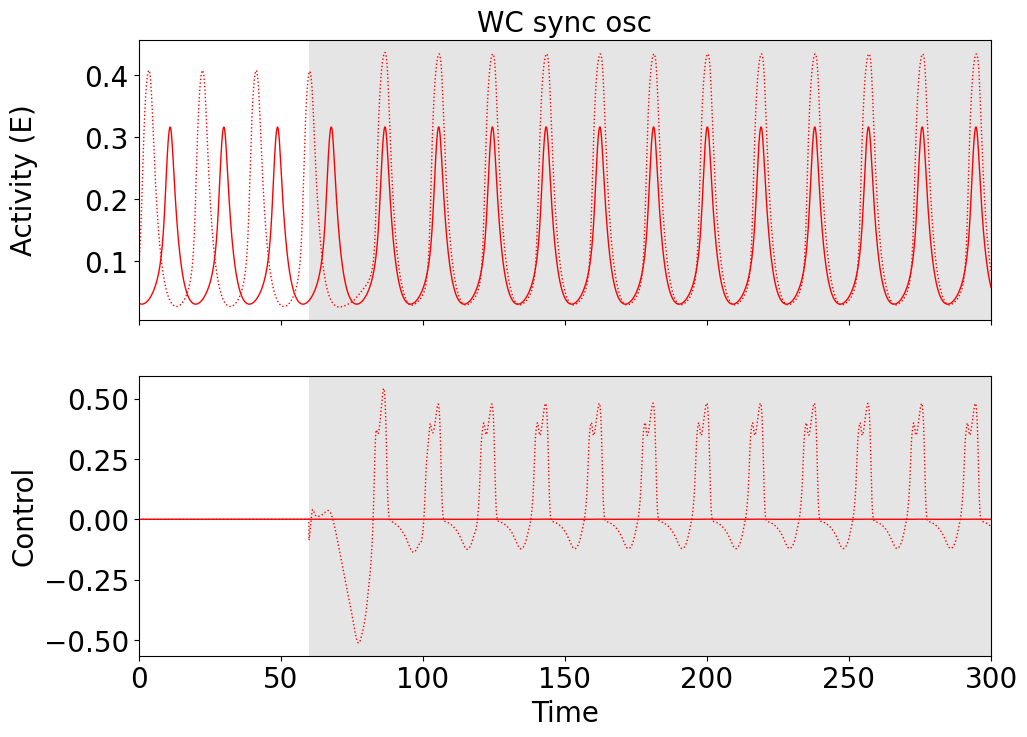

In [76]:
fig, ax = plt.subplots(2,1, figsize=(1100*px, 800*px), sharex="col")
time_wc = np.arange(0,300.1, 0.1)

ind_wc = [0,2,2]

ax[0].plot(time_wc, data_wc_2n["E"]["state"][ind_wc[0]][ind_wc[1]][ind_wc[2]][0,0,:3001], color="red")
ax[0].plot(time_wc, data_wc_2n["E"]["state"][ind_wc[0]][ind_wc[1]][ind_wc[2]][1,0,:3001], color="red", linestyle=":")

ax[1].plot(time_wc, data_wc_2n["E"]["control"][ind_wc[0]][ind_wc[1]][ind_wc[2]][0,0,:3001], color="red")
ax[1].plot(time_wc, data_wc_2n["E"]["control"][ind_wc[0]][ind_wc[1]][ind_wc[2]][1,0,:3001], color="red", linestyle=":")

ax[0].set_xlim(0,300)
ax[1].set_xlabel("Time")

ax[0].set_ylabel("Activity (E)")
ax[1].set_ylabel("Control")

ax[0].axvspan(60, 300, facecolor='gray', alpha=0.2)
ax[1].axvspan(60, 300, facecolor='gray', alpha=0.2)

ax[0].set_title(r"WC sync osc")

plt.subplots_adjust(wspace=0.3, hspace=0.2)
fig.align_ylabels(ax[:])
fig.savefig(os.path.join(savedir, "t3.png"), bbox_inches='tight')